In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/test.csv
/kaggle/input/digit-recognizer/train.csv


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np 
import pandas as pd
import tensorflow as tf

In [3]:
mnist_train = pd.read_csv("../input/digit-recognizer/train.csv")
mnist_test = pd.read_csv("../input/digit-recognizer/test.csv")

In [4]:
mnist_train_data = mnist_train.loc[:, "pixel0":]
mnist_train_label = mnist_train.loc[:, "label"]
mnist_train_data = mnist_train_data/255.0
mnist_test = mnist_test/255.0

In [5]:
mnist_train_data = np.array(mnist_train_data)
mnist_train_label = np.array(mnist_train_label)
mnist_train_data = mnist_train_data.reshape(mnist_train_data.shape[0], 28, 28, 1)
print(mnist_train_data.shape, mnist_train_label.shape)

(42000, 28, 28, 1) (42000,)


In [6]:
mnist_test_arr = np.array(mnist_test)
mnist_test_arr = mnist_test_arr.reshape(mnist_test_arr.shape[0], 28, 28, 1)
print(mnist_test_arr.shape)

(28000, 28, 28, 1)


In [7]:
from keras.utils import np_utils
nclasses = mnist_train_label.max() - mnist_train_label.min() + 1
mnist_train_label = np_utils.to_categorical(mnist_train_label, num_classes = nclasses)
print("Shape of y_train after encoding: ", mnist_train_label.shape)

Shape of y_train after encoding:  (42000, 10)


In [8]:
x_train=mnist_train_data
x_test=mnist_test_arr
y_train=mnist_train_label
x_train.shape

(42000, 28, 28, 1)

In [9]:
x_val=x_train[33600:] 
x=x_train[:33600]
y_val= y_train[33600:]
y=y_train[:33600]
y.shape

(33600, 10)

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
datagen = ImageDataGenerator(
       featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False) 


datagen.fit(x)

In [12]:
x.shape

(33600, 28, 28, 1)

In [13]:
from keras.optimizers import SGD

In [14]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (5,5), activation='relu', input_shape=(x_train.shape[1:])),  
 tf.keras.layers.Conv2D(32, (5,5), activation='relu'),
  tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
        tf.keras.layers.Dropout(0.2),
tf.keras.layers.Conv2D(64, (5,5), activation='relu'),  
 tf.keras.layers.Conv2D(64, (5,5), activation='relu'),
  tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Flatten(),
    
#   tf.keras.layers.Dense(4096, activation='relu'),
# #     tf.keras.layers.Dropout(0.2),
#   tf.keras.layers.Dense(2048, activation='relu'),
# #     tf.keras.layers.Dropout(0.2),
#   tf.keras.layers.Dense(1024, activation='relu'),
# #     tf.keras.layers.Dropout(0.2),
#   tf.keras.layers.Dense(512, activation='relu'),
# #     tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
# #     tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])
learning_r= 0.01
weight_decay=1e-6
mometum=0.5
sgd= SGD(lr=learning_r,decay=weight_decay,momentum=mometum, nesterov=True)
model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 20, 20, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 10, 10, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 64)          51264     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 2, 2, 64)          102464    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 1, 64)          0

In [15]:
hist= model.fit(datagen.flow(x,y) ,epochs=50,    validation_data= (x_val,y_val), verbose=1)

Epoch 1/50
1050/1050 [==============================] - 16s 15ms/step - loss: 1.4480 - accuracy: 0.4907 - val_loss: 0.1962 - val_accuracy: 0.9439
Epoch 2/50
1050/1050 [==============================] - 15s 14ms/step - loss: 0.4018 - accuracy: 0.8742 - val_loss: 0.1047 - val_accuracy: 0.9686
Epoch 3/50
1050/1050 [==============================] - 15s 14ms/step - loss: 0.2491 - accuracy: 0.9269 - val_loss: 0.0772 - val_accuracy: 0.9765
Epoch 4/50
1050/1050 [==============================] - 15s 14ms/step - loss: 0.1890 - accuracy: 0.9435 - val_loss: 0.0480 - val_accuracy: 0.9850
Epoch 5/50
1050/1050 [==============================] - 16s 15ms/step - loss: 0.1546 - accuracy: 0.9546 - val_loss: 0.0392 - val_accuracy: 0.9882
Epoch 6/50
1050/1050 [==============================] - 15s 15ms/step - loss: 0.1336 - accuracy: 0.9606 - val_loss: 0.0458 - val_accuracy: 0.9850
Epoch 7/50
1050/1050 [==============================] - 15s 14ms/step - loss: 0.1213 - accuracy: 0.9646 - val_loss: 0.0371 -

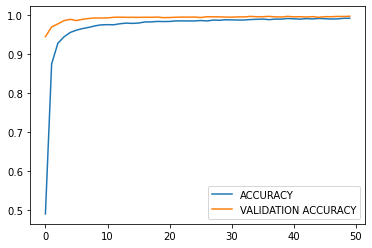

In [16]:
plt.plot(hist.history['accuracy'],label = 'ACCURACY')
plt.plot(hist.history['val_accuracy'],label = 'VALIDATION ACCURACY')
plt.legend()

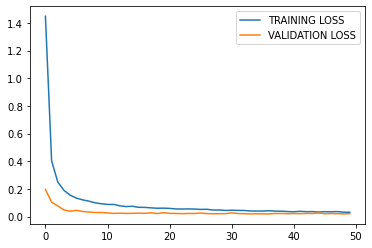

In [17]:
plt.plot(hist.history['loss'],label = 'TRAINING LOSS')
plt.plot(hist.history['val_loss'],label = 'VALIDATION LOSS')
plt.legend()

In [18]:
p = model.predict(x_test)

In [19]:
p_t = []

for i in p:
    p_t.append(np.argmax(i))



In [20]:
submission =  pd.DataFrame({
        "ImageId": mnist_test.index+1,
        "Label": p_t
    })

submission.to_csv('my_submission.csv', index=False)